In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [16]:
# # make up a data before team mates finish their analysis of the data frame
# madeupdata={'Fine Art':[50000,5000,75000,10000,100000,12000],'Engineering':[80000,12000,150000,30000,179000,45000], 
#             'Video Gaming':[46000,3200,89000,4500,123000,9500]}
# madeuplist=['Fine Art', 'Engineering', 'Video Gaming']
# madeupslope=[ [45000, 55000, 65000, 85000, 88000, 112000], [68000, 92000, 120000, 180000, 134000,224000],[41800, 49200, 84500, 93500, 132500]]


In [34]:
# takes in a dictionary of the format {major_name:[undergrad_income, undergrad_income_std, master_income, master_income_std,
# Phd_income, Phd_income_std], and so on}. And returns the major names as a list, and another list of 
# [undergrad_income+-undergrad_income_std, master_income+-master_income_std, Phd_income+-Phd_income_std]
# +- means plus and minus so the array is 1 by 6 for each major.
# def processdata(data:dict):
#     keys=list(data.keys())

#     return keys

In [11]:
# takes in the 1 by 6 list of [undergrad_income+-undergrad_income_std, master_income+-master_income_std, Phd_income+-Phd_income_std]
# from the previous function as slope, and point would be coordinates of
# [undergrad_tuition,undergrad_years,master_tuition,master_years,Phd_tuition,Phd_years]
# and returns the y intercet (x=0) of the lines of the six lines we are plotting for each major.

# def yintercept(slopes:list, points:list):

  
    

In [107]:
madeupslope=[45000, 55000, 65000, 85000, 88000, 112000]
madeupintercept=[-45000,-205000,-245000,-345000,-425000]
madeuplegend=['Fine Art']

In [108]:
# Don't worry about this one for now.
def plotline(slope:list, yintercept:list,legend:list):
    #plot a line with known slope and y intercept
    #figure people works for 60 years before retiring just to be safe.
    x_axis1 = np.arange(0, 20, 1) 
    x_axis2 = np.arange(2, 20, 1) 
    x_axis3 = np.arange(4, 20, 1)
    y1=x_axis1*slope[0]+yintercept[0]
    y2=x_axis1*slope[1]+yintercept[0]
    y3=x_axis2*slope[2]+yintercept[1]
    y4=x_axis2*slope[3]+yintercept[2]
    y5=x_axis3*slope[4]+yintercept[3]
    y6=x_axis3*slope[5]+yintercept[4]
    ax1,=plt.plot(x_axis1,y1,'g--',label="-std",linewidth=1,)
    plt.plot(x_axis1,y2,'g',label="+std",linewidth=1,)
    plt.plot(x_axis2,y3,'b--',label="-std",linewidth=2,)
    plt.plot(x_axis2,y4,'b',label="+std",linewidth=2,)
    plt.tight_layout() 
    plt.legend()
    plt.title("Undergrad vs Master Income") 
    plt.xlabel("Years Out of College")
    plt.ylabel("Accumulate Income $") 
    plt.figure()
    plt.plot(x_axis1,y1,'g--',label="-std",linewidth=1,)
    plt.plot(x_axis1,y2,'g',label="+std",linewidth=1,)
    plt.plot(x_axis3,y5,'r--',label="-std",linewidth=2,)
    plt.plot(x_axis3,y6,'r',label="+std",linewidth=2,)
    plt.tight_layout() 
    plt.legend()
    plt.title("Undergrad vs Phd Income $") 
    plt.xlabel("Years Out of College")
    plt.ylabel("Accumulate Income") 
#     fig1, (ax1,ax2,ax3,ax4)=plt.subplots(nrows=4, ncols=1)
#     ax1.plot(x_axis, y1)
#     ax2.plot(x_axis, y2)
#     ax3.plot(x_axis, y3)
#     ax4.plot(x_axis, y4)    


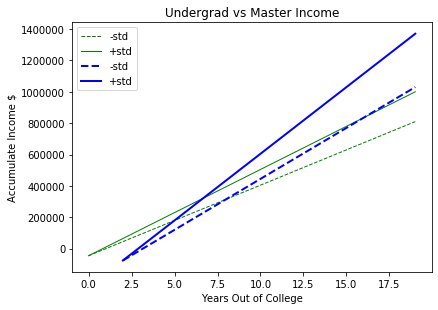

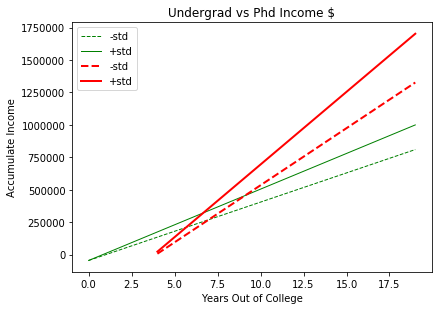

In [109]:
plotline(madeupslope,madeupintercept,madeuplegend)   